# Assignment 02: Scikit Learn Basic Regression and Classification

**Due Date:** Friday 09/29/2023 (5pm) 

**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Anas Mohammad

CWID-5: (22515)


## Introduction
--------

In this exercise we will be performing a regression and classification task using the Scikit learn framework, and the Python statsmodel library.  You should work through the tutorial on using scikit-learn and statsmodel before doing this assignment, as well as work on the materials from our units on regression and classification tasks.

For the first part of this assignment, I recommend looking through the following tutorials on using
Scikit Learn and the statsmodel library for linear regression:

[A Beginners guide to Linear Regression in Python with Scikit-Learn](https://medium.com/analytics-vidhya/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-6b0fe70b32d7)


[Use statsmodels to Perform Linear Regression in Python](https://datatofish.com/statsmodels-linear-regression/)

I am using this material as a reference for the first part of this assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# By convention, we often just import the specific classes/functions
# from scikit-learn we will need to train a model and perform prediction.
# Here we include all of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

# statsmodels has an api, it is often imported as sm by convention
import statsmodels.api as sm

In [2]:
# set default figure size, 8in by 6in and figure properties here
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8) 

## Linear Regression with One Variable
--------


### Load and Explore Data

There is a file named `assg-02-weather.csv` in the data subdirectory.  Load this file into a
pandas dataframe.

In [3]:
# load file into a dataframe here
import pandas as pd
data=pd.read_csv('../data/assg-02-weather.csv')
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


Do some basic data exploration.  Perform the following tasks.

1. Determine the number of samples in this data set.  Determine the number of features as well.
2. Display the types of the features that were read in and determined by default by Pandas in this dataframe.
3. For the numeric data types, describe the basic information about the min, max and ranges of the numeric data
4. Count the number of missing or NaN data in the dataframe (if any), show the counts of missing data for each of the features in the dataframe.

In [4]:
# 1. determine number of samples and number of features here
s,f=data.shape
print('number of samples:', s)
print('number of features:', f)


number of samples: 366
number of features: 22


In [5]:
# 2. determine feature types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [6]:
# 3. display basic information about the range of numeric features in the data 
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [7]:
# 4. determine if there is any missing data in the dataset, show counts of missing data for each feature
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

### Visualize the Data

We will try and create a linear regression model of the relationship between temperature and
evaporation.  There are several temperature measurements in this dataset.  

1. Using base matplotlib, create a scatter plot the relationship between
   the `Temp9am` and `Evaporation` recorded values.
   The temperature should be the independent variable (x axis) and evaporation measurement the dependent
   variable (y axis) in this plot.  Label your axis, you weren't given a data dictionary but
   see if you can figure out the likely units used to record temperature and pressure in this data
   and label the axes accordingly.  

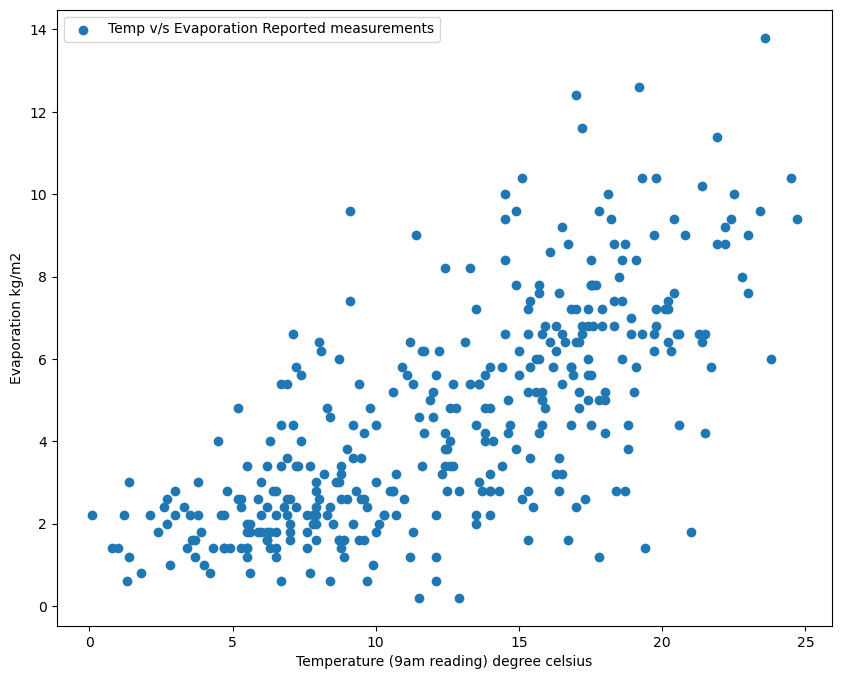

In [8]:
# create a scatter plot of Temp9am vs. Evaporation here
plt.scatter (data.Temp9am, data.Evaporation);
plt.xlabel("Temperature (9am reading) degree celsius");
plt.ylabel("Evaporation kg/m2");
plt.legend(["Temp v/s Evaporation Reported measurements"]);

### Build and Evaluate a Scikit-learn LinearRegression Model

We will fit a linear regression model, first using the scikit-learn framework.

Create a LinearRegression model and fit all of the 9am temperature data (independent variable) to try and
predict evaporation (dependent variable). Perform the following tasks

1. Fit a scikit-learn LinearRegression to the 9am temperature data to predict evaporation.  Use all default metaparameter
   values, do not change any of the default settings for the scikit-learn linear regression.
2. Report the slope and intercept coefficients you obtained when fitting this model.
3. Report the RMSE error total of this model on all of the data it was fitted with.
4. Report the R^2 score of this fitted model.  The R^2 score is related to but slightly different from
   the RMSE.
5. Replot the scatter plot of your data.  But show the fitted line from the linear regression on the model.
   Label the axis the same as before.  But this time include a legend.  Make sure the data is plotted as scatter
   plot points and identified as suche in the figure.  Also plot the model as a line and identify it in the legend.  Make your figure look like the following.  The regression model line you obtain should
   match the one shown in this figure.

![Regression Model Result](../figures/assg-02-regression-result.png)

In [9]:
# 1. fit scikit-learn LinearRegression to the temperature / evaporation data
x = data.loc[:, ["Temp9am"]]
y = data.loc[:, ["Evaporation"]]
model = LinearRegression().fit(x,y)


In [10]:
# 2. report the slope and intercept coefficients of the fitted model
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept:", intercept)
print("Slope:", slope)

Intercept: [0.37578175]
Slope: [0.33548459]


In [11]:
# 3. calculate and report the RMSE error obtained on this model with all of the data we used to fit the model
y_predict = model.predict(x)
rmse = mean_squared_error(y, y_predict)
print(rmse)

3.5473465427798607


In [12]:
# 4. report the R^2 score of this fit. 
r2_ = r2_score(y,y_predict)
print("R-Squared Fit:", r2_)

R-Squared Fit: 0.5008050204985712


In [13]:
x = x.to_numpy()
y = y.to_numpy()

In [14]:
x = x[:,0]
y = y[:,0]

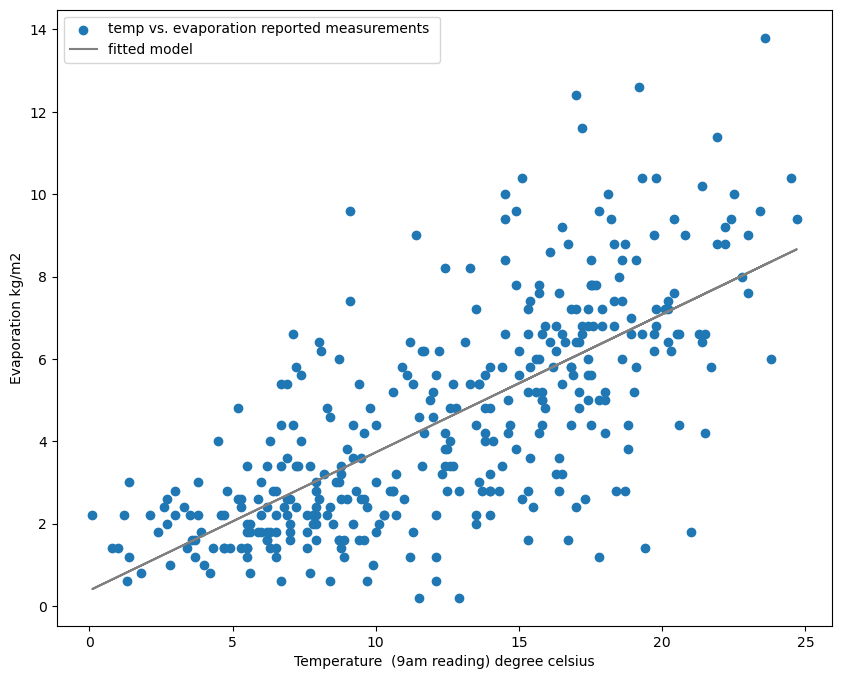

In [15]:
# 5. replot scatter plot of data adding in fitted regression model line to plot
plt.scatter (data.Temp9am, data.Evaporation);
plt.xlabel("Temperature  (9am reading) degree celsius")
plt.ylabel("Evaporation kg/m2")
(m,b) = np.polyfit(x, y_predict, 1)
plt.plot(x, m*x+b, color="grey")
plt.legend(["temp vs. evaporation reported measurements ", "fitted model"]);


### Build and Evaluate a statsmodel LinearRegression Model

For comparison, use the statsmodel library to perform a linear regression on the same
independent variable (temperature at 9am) to predict evaporation.  Perform the
following tasks.

1. Create and fit a statsmodel OLS (ordinary least squared) regression of the data.  You will need
   to correctly use the statsmodel API here as discussed.  Also don't forget that, for reasons, you
   will need to create a dummy intercept term for your input data for the statsmodel OLS
2. Use the statsmodel summary function to display information about the fitted model.
3. Determine the intercept and slope coefficients from the summary.  Determine the R^2 score.  Do these match the results obtained in the scikit-learn regression?

In [16]:
# 1. Create and fit a statsmodel OLS regression
x = sm.add_constant(x)
ols = sm.OLS(y, x)
model = ols.fit()

In [17]:
# 2. display summary information about the statsmodel OLS linear regression model fit
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     365.2
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           7.17e-57
Time:                        16:55:21   Log-Likelihood:                -751.05
No. Observations:                 366   AIC:                             1506.
Df Residuals:                     364   BIC:                             1514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3758      0.238      1.576      0.116      -0.093       0.845
x1             0.3355      0.018     19.110      0.000       0.301       0.370
==============================================================================
Omnibus:                       13.812   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.192
Skew:                           0.308   Prob(JB):                     6.80e-05
Kurtosis:                       3.938   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# 3. Determine the slope and intercept terms as well asthe rsquared fit result
# Do these match the model obtained by scikit-learn
model.params


array([0.37578175, 0.33548459])

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     365.2
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           7.17e-57
Time:                        16:55:25   Log-Likelihood:                -751.05
No. Observations:                 366   AIC:                             1506.
Df Residuals:                     364   BIC:                             1514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3758      0.238      1.576      0.116      -0.093       0.845
x1             0.3355      0.018     19.110      0.000       0.301       0.370
==============================================================================
Omnibus:                       13.812   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.192
Skew:                           0.308   Prob(JB):                     6.80e-05
Kurtosis:                       3.938   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Binary Classification using Logistic Classifier
--------

### Encode Categorical Variables

The weather dataset you were given contains several categorical variables.  We will try and build
a binary classifier on the `RainTomorrow` attribute.  Do the following tasks

1. Confirm that the rain tomorrow attribute is in fact a binary categorical variable. For example, use
   methods to determine all of the unique values and count how many of each you have for that attribute.
2. Create a simple pipeline to encode the rain tomorrow attribute as ordinal (integer) values.  Make sure 
   that "no rain tomorrow" is encoded as the false or 0 value, and "yes rain tomorrow"
   is encoded as the true or 1 value.
3. Encode the rain tomorrow as a categorical variable.  Save the results in a dataframe or numpy array
   (you can call it `y` or `labels`) to use as the target values for training.
4. To double check, verify that no is encoded as 0 or false and yes as 1 or true after you encode the
   categorical variable.


In [20]:
# 1. verify that the rain tomorrow string attribute is a binary categorical variable by
#    determining all unique categories and counting the number of each unique category
Rain_Tomorrow = data.loc[:,["RainTomorrow"]]

In [21]:
# 2. create ordinal encoder pipeline to encode the rain tomorrow attribute
encoder = OrdinalEncoder()

In [22]:
# 3. encode the rain tomorrow as categorical variables and save result in array
#    array y or labels for training
labels = encoder.fit_transform(Rain_Tomorrow)

In [23]:
# 4. double check that no is encoded as 0 and yes as 1 in ordinal encoding
labels

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

### Impute Missing Data

We will be using the `Sunshine` and `Pressure3pm` attributes when building a classifier.
There is some missing values in one of these attributes.

1. Create a new dataframe or numpy array with only 2 features/columns, the `Sunshine`
   and `Pressure3pm` attributes.
2. Determine the number of missing values in each of the two attributes `Sunshine` and `Pressure3pm`
3. Create a simple imputer that will fill in missing values with
   the mean value of that attribute
4. Fit the imputer and use it to fill in missing values in your dataframe with only
   the two attributes we will use.
5. Confirm that there are no longer any missing values in the dataframe/numpy array you will use for
   training.

In [24]:
# 1. Create a new dataframe/numpy array with only the 2 features Sunshine and Pressure3pm
data_new = data.iloc[:, [4,14]]


In [25]:
# 2. Determine number of missing values in Sunshine and Pressuer3pm features
data_new.isnull().sum()

Sunshine       3
Pressure3pm    0
dtype: int64

In [26]:
d = pd.isnull(data_new["Sunshine"])
data_new[d]

,Sunshine,Pressure3pm
221,NaN,1027.9
300,NaN,1025.5
348,NaN,1016.7


In [27]:
# 3. Create a simple imputer to fill in missing values with mean value of attribute
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


In [ ]:
# 4. Impute missing values and fill them in with the mean of the attribute
imputer.fit(data_new)
mask = pd.isnull(data_new["Sunshine"])
data_new = imputer.transform(data_new)

In [ ]:
# 5. Confirm that there are no longer any missing values
np.isnan(data_new).sum()


### Visualize Binary Classification Task

We will use the attributes `Sunshine` and `Pressure3pm` to try and build a binary classifier to predict
the rain tomorrow binary label.  First of all lets visualize the task.  Create a plot that:

1. Plot the `Sunshine` attribute as the x axis variable, and the 'Pressure3pm' attribute
   for the y axis, make sure this is a scatter plot.
2. Use shape and/or color to provide a label for each point.  Plot all points on the figure
   where rain tomorrow is yes using a shape/color, then plot all the points for no using a
   different shape/color.  This means you need to separate out these and create two separate
   scatter plots on the figure.
4. Make sure that you create a legend that identifies the point color/shape chose for your yes/no
   category.
5. Label your x and y axis appropriately for the attributes you plotted on them.

In [ ]:
rain_x = data.loc[(data["RainTomorrow"]=="Yes"),["Sunshine"]]
rain_y = data.loc[(data["RainTomorrow"]=="Yes"),["Pressure3pm"]]
norain_x = data.loc[(data["RainTomorrow"]=="No"),["Sunshine"]]
norain_y= data.loc[(data["RainTomorrow"]=="No"),["Pressure3pm"]]



In [ ]:
# create your plot here that
# 1. scatter plot Sunshine as x axis variable and RISK_MM as y axis variable
# 2. perform separate plots for samples where rain tomorrow is yes, vs. where rain tomorrow is no
#    use color/shape to differentiate these two categories in the plot
# 3. create a legend that identifies rain tomorrow yes/no points in figure
# 4. make sure you label your axes and add any other useful information to the figure
plt.scatter(x = rain_x, y=rain_y, color="pink")
plt.scatter(x = norain_x, y=norain_y, color="green")
plt.legend(["yes - Rain Tomorrow", "no-Rain Tomorrow"])
plt.xlabel("Sunshine")
plt.ylabel("Pressure at 3pm")

### Build Classifier using Scikit-learn LogisticRegression

Despite its name, the `LogisticRegression` method and object in scikit-learn is used
for classification tasks.  Create and fit a Logistic Regression to the `Sunshine` and
`Pressure3pm` features.  Perform the following tasks

1. Create a `LogisticRegression` using scikit-learn framework.  To make the decision boundary
   easier to visualize, use the following parameters when you create this object:
   `solver='newton-cg', tol=0.001`
2. Fit the logistic regression model to the `Sunshine` and `Pressure3pm` attributes.  Use the X inputs
   you created before with missing values filled in. You should already have the
   y/labels created for the binary classes from before.
3. Report the intercept and model coefficients found for the fitted logistic regression.
4. Report the accuracy that this model achieves on all of the data you fit the model with.
5. Display a confusion matrix of the performance of this model on all of the data.

In [ ]:
# 1. Create a LogisticRegression object
model = LogisticRegression(solver='newton-cg', tol=0.001)

In [ ]:
# 2. Fit the logistic regression model to the Sunshine and Pressuer3pm attributes to
#    classify the binary category rain tomorrow yes/no labels
X = data_new
y = data.loc[:,["RainTomorrow"]]
fit_ = model.fit(X,y.values.ravel())

In [ ]:
# 3. Report fitted model intercept and parameter coefficients
print(fit_.coef_, fit_.intercept_)

In [ ]:
# 4. Report the accuracy of this model on the data it was trained with
score = model.score(X,y)

In [ ]:
print(score)

In [ ]:
# 5. Display a confusion matrix of the performance of the model
predict_rain = model.predict(X)
con_matrix = confusion_matrix(y,predict_rain)
print(con_matrix)

### Visualize Classifier Decision Boundary

When a classification model is fit to a set of binary data, it will determine a
decision boundary.  On one side of this boundary, it predicts 'no'/'false', and on
the other side it predicts 'true'.

You can visualize the decision boundary created by your logistic regression model.
The slope and intercept coefficients you should have displayed above will describe
the decision boundary line that was fit by the logistic regression.  When we plotted
your data, you should have used Sunshine as the x axis values, and Pressure3pm as the
y axis values.  The logistic regression model should have given you 1 intercept and 2 coefficients.
The model of the decision boundary line is thus:

\begin{equation}
0 = \text{intercept} + \text{coef}_0 \times \text{Sunshine} + \text{coef}_1 \times \text{Pressure3pm}
\end{equation}

or

\begin{equation}
0 = b + \theta_0  x + \theta_1  y
\end{equation}



Remember that we use Sunshine as our x values and Pressure3pm as our y values.  We can substitute those names
and then solve for y to get the following expression:

\begin{equation}
y = \frac{-(b + \theta_0 x)}{\theta_1}
\end{equation}

This equation allows you to determine the decision boundary line, given the intercept ($b$) of your
model and the two fitted coefficients $\theta_0 \theta_1$.  For example, to determine the line, you can
plot 2 points. The x axis Sunshine ranges from 0 to 14, so you could determine the y (Pressure3pm) location
of the decision boundary at those 2 points and draw a line on the figure to visualize the decision boundary.

You thus need to perform the following tasks to visualize the decision boundary that your fitted
logistic regression model found:

1. Replot your scatter plot figure from before of the Sunshine vs. Pressure3pm points using different markers
   for the yes rain / no rain.
2. Using the intercept and coefficient of your model, determine 2 points on the decision boundary line.  Add
   this line to the figure.
3. Make sure your legend includes a label for the decision boundary line.  Make sure axes are labeled
   and legend identifies yes, no markers and the decision boundary line.

Your resulting figure should look as close to the following as possible.  You should get the shown
decision boundary line if you use the parameters shown for your logistic regression:

![Logistic Classification Decision Boundary](../figures/assg-02-decision-boundary.png)

In [ ]:
# replot your scatter plot here
plt.scatter(x = norain_x,y=norain_y,color = "blue",alpha = 0.3)
plt.scatter(x=rain_x,y=rain_y,color = "pink",marker="X")
plt.xlabel("Sunshine")
plt.ylabel("Pressure at 3pm")
# and add in decision boundary line that the fitted model determined
c = fit_.coef_
i = fit_.intercept_
points = [(-(i+c[0,0]*0)/c[0,1]),(-(i+c[0,0]*14)/c[0,1])]
plt.plot([0,14],points,linestyle="--",color="black")
plt.legend(["no rain tomorrow","yes rain tomorrow","decision boundary"])

### Build Classifier using statsmodel Logit

We will also demonstrate building a binary classifier using the statsmodel library.
Perform the following:

1. Remember that you will need to add a dummy constant term to your X inputs with the two features
   `Sunshine` and `Pressure3pm`.
2. Create a statsmodel Logit instance and fit it to your two features (and dummy constant feature) and binary category labels.
   Remember that the api for statsmodel reverses the order of the inputs and the labels when fitting.
   Do not change any of the default metaparamters of the Logit, use the default settings for this model.
4. Display a summary of the fitted model obtained by the statsmodel Logit
5. Use the fitted statsmodel Logit to determine the accuracy it achieves on the data it was trained with.
6. Compare results from statsmodel and scikit learn.  Did they get an equivalent model?

In [ ]:
# 1. Add constant term to X inputs for statsmodel
X = sm.add_constant(X)
y = labels

In [ ]:
# 2. Create Logit instance and fit it to the data
logit_ = sm.Logit(y,X)
logit_model = logit_.fit()

In [ ]:
# 3. Display a summary of the statsmodel fit
logit_model.summary()

In [ ]:
def score(predict,true_values):
    n = true_values.shape[0]
    count = 0 
    for i in range(len(true_values)):
        if(true_values[i]==predict[i]):
            count+=1
    return count/n

In [ ]:
# 4. Calculate accuracy of statsmodel on all data
predicting_values = logit_model.predict(X)
prediction = np.where(predicting_values<0.8,0,1)
accuracy = score(prediction,np.flip(labels))
print(accuracy)

**5. Compare the Results**

Discuss and compare the two classifiers.  Are the parameters obtained the same?  Do they
achieve the same accuracy?

## Extra: Improve the Classifier
--------

I may give a point or to back of missed points on the assignment for doing the following.
We only used 2 features in our classifier because that makes it possible to visualize the
decision boundary.  However, the RISK_MM feature is highly correlated with the rain tomorrow
binary label we are trying to predict.

Create a logistic regression model (you can use either scikit-learn or statsmodel or both).  But this
time train with the RISK_MM, along with the other two features we used before.  Report accuracy and confusion matrix for this model.  If interested, you can look at the correlation of other features
given in the dataset, and try adding others besides these 3 to see if you can get further improvements.

In [ ]:
new_col = data.loc[:,["RISK_MM"]]
new_col = new_col.to_numpy()

In [ ]:
new_data = np.concatenate((data_new,new_col),axis=1)
new_data

In [ ]:
X = new_data
y = labels

In [ ]:
logit_2 = sm.Logit(y,X)
logit_model2 = logit_2.fit()

In [ ]:
logit_model2.summary()

In [ ]:
predicting_values2 = logit_model2.predict(X)
prediction2 = np.where(predicting_values2<0.8,0,1)
accuracy2 = score(prediction2,np.flip(labels))
print(accuracy2)